In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import numpy as np

In [2]:
data_washington = pd.read_csv('comptages-routiers-permanents_washington.csv', sep=';', parse_dates=True)
data_convention = pd.read_csv('comptages-routiers-permanents_convention.csv', sep=';', parse_dates=True)
data_sts = pd.read_csv('comptages-routiers-permanents_sts.csv', sep=';', parse_dates=True)

In [3]:
data_washington['Date et heure de comptage'] = data_washington['Date et heure de comptage']\
    .apply(lambda x: pd.to_datetime(x, format='%Y-%m-%dT%H:%M:%S%z'))
data_convention['Date et heure de comptage'] = data_convention['Date et heure de comptage']\
    .apply(lambda x: pd.to_datetime(x, format='%Y-%m-%dT%H:%M:%S%z'))
data_sts['Date et heure de comptage'] = data_sts['Date et heure de comptage']\
    .apply(lambda x: pd.to_datetime(x, format='%Y-%m-%dT%H:%M:%S%z'))

In [4]:
data_washington.set_index('Date et heure de comptage', inplace=True)
data_convention.set_index('Date et heure de comptage', inplace=True)
data_sts.set_index('Date et heure de comptage', inplace=True)

In [5]:
print('The columns are {}'.format(list(data_washington.columns)))

The columns are ['Identifiant arc', 'Libelle', 'Débit horaire', "Taux d'occupation", 'Etat trafic', 'Identifiant noeud amont', 'Libelle noeud amont', 'Identifiant noeud aval', 'Libelle noeud aval', 'Etat arc', 'Date debut dispo data', 'Date fin dispo data', 'geo_point_2d', 'geo_shape']


In [6]:
print('The number of points in washington dataset are: {}'.format(data_washington.shape[0]))
print('The number of points in convention dataset are: {}'.format(data_convention.shape[0]))
print('The number of points in Saints Père dataset are: {}'.format(data_sts.shape[0]))

The number of points in washington dataset are: 9428
The number of points in convention dataset are: 189580
The number of points in Saints Père dataset are: 9478


In [7]:
data_washington.isnull().sum()

Identifiant arc             0
Libelle                     0
Débit horaire              77
Taux d'occupation          85
Etat trafic                 0
Identifiant noeud amont     0
Libelle noeud amont         0
Identifiant noeud aval      0
Libelle noeud aval          0
Etat arc                    0
Date debut dispo data       0
Date fin dispo data         0
geo_point_2d                0
geo_shape                   0
dtype: int64

In [8]:
data_convention.isnull().sum()

Identifiant arc                0
Libelle                        0
Débit horaire              23398
Taux d'occupation          27557
Etat trafic                    0
Identifiant noeud amont        0
Libelle noeud amont            0
Identifiant noeud aval         0
Libelle noeud aval             0
Etat arc                       0
Date debut dispo data          0
Date fin dispo data            0
geo_point_2d                   0
geo_shape                      0
dtype: int64

In [9]:
data_sts.isnull().sum()

Identifiant arc             0
Libelle                     0
Débit horaire              64
Taux d'occupation          63
Etat trafic                 0
Identifiant noeud amont     0
Libelle noeud amont         0
Identifiant noeud aval      0
Libelle noeud aval          0
Etat arc                    0
Date debut dispo data       0
Date fin dispo data         0
geo_point_2d                0
geo_shape                   0
dtype: int64

In [10]:
print('We started to collect the data from washington from {} to {}'.format(
    sorted(data_washington.index)[0], sorted(data_washington.index)[-1]))
print('We started to collect the data from convention from {} to {}'.format(
    sorted(data_convention.index)[0], sorted(data_convention.index)[-1])) 
print('We started to collect the data from Saints Père from {} to {}'.format(
    sorted(data_sts.index)[0], sorted(data_sts.index)[-1]))

We started to collect the data from washington from 2019-11-01 04:00:00+01:00 to 2020-11-30 00:00:00+01:00
We started to collect the data from convention from 2019-11-01 04:00:00+01:00 to 2020-12-02 00:00:00+01:00
We started to collect the data from Saints Père from 2019-11-01 04:00:00+01:00 to 2020-12-02 00:00:00+01:00


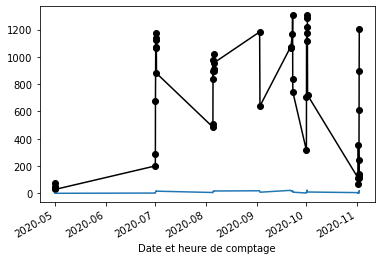

In [11]:
data_washington.iloc[:50, 2].plot(style='k-o')
data_washington.iloc[:50, 3].plot()

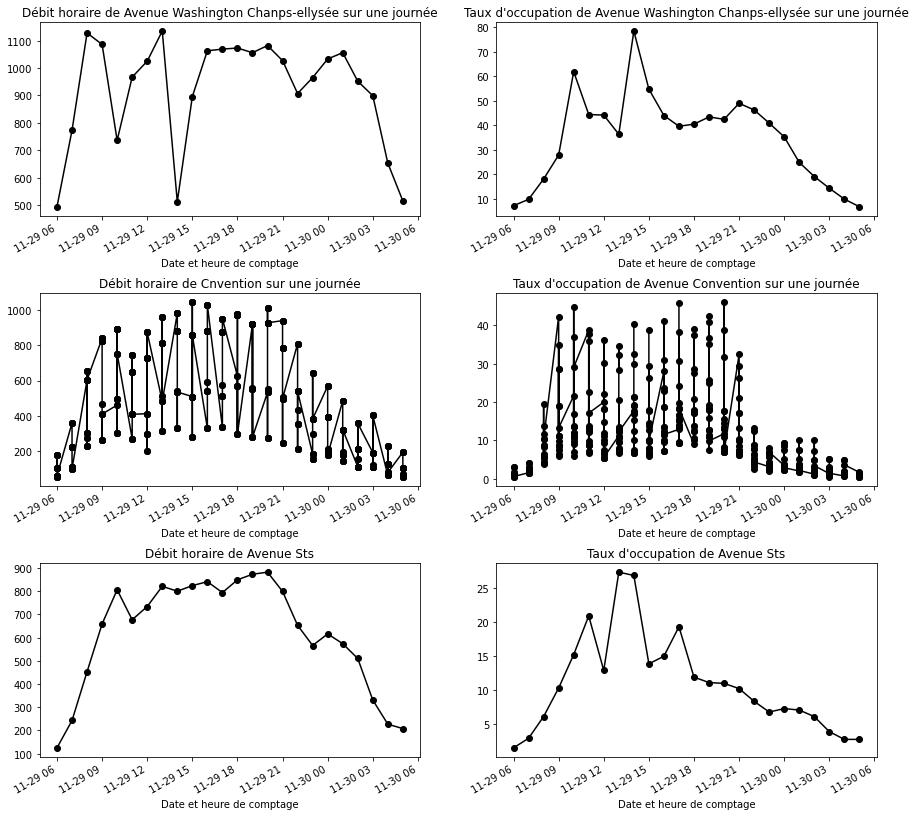

In [12]:
t_min = pd.Timestamp('2019-11-29 05:00:00+0100')
t_max = pd.Timestamp('2019-11-30 05:00:00+0100')

fig = plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace = .4)

mask = (data_washington.index > t_min) & (data_washington.index <= t_max)
ax1 = fig.add_subplot(321)
ax1.set_title('Débit horaire de Avenue Washington Chanps-ellysée sur une journée')
data_washington.loc[mask, 'Débit horaire'].plot(ax=ax1, style='k-o')
ax2 = fig.add_subplot(322)
ax2.set_title('Taux d\'occupation de Avenue Washington Chanps-ellysée sur une journée')
data_washington.loc[mask, 'Taux d\'occupation'].plot(ax=ax2, style='k-o')

mask = (data_convention.index > t_min) & (data_convention.index <= t_max)
ax3 = fig.add_subplot(323)
ax3.set_title('Débit horaire de Cnvention sur une journée')
data_convention.loc[mask, 'Débit horaire'].plot(ax=ax3, style='k-o')
ax4 = fig.add_subplot(324)
ax4.set_title('Taux d\'occupation de Avenue Convention sur une journée')
data_convention.loc[mask, 'Taux d\'occupation'].plot(ax=ax4, style='k-o')

mask = (data_sts.index > t_min) & (data_sts.index <= t_max)
ax5 = fig.add_subplot(325)
ax5.set_title('Débit horaire de Avenue Sts')
data_sts.loc[mask, 'Débit horaire'].plot(ax=ax5, style='k-o')
ax6 = fig.add_subplot(326)
ax6.set_title('Taux d\'occupation de Avenue Sts')
data_sts.loc[mask, 'Taux d\'occupation'].plot(ax=ax6, style='k-o')

plt.show()

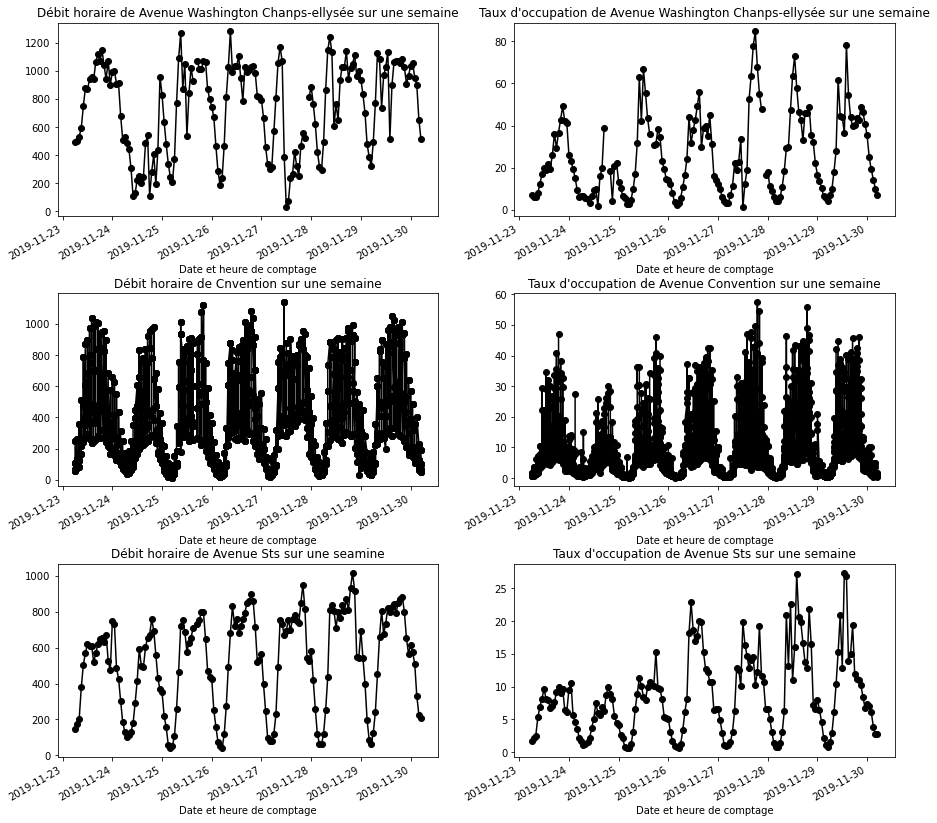

In [13]:
t_min = pd.Timestamp('2019-11-23 05:00:00+0100')
t_max = pd.Timestamp('2019-11-30 05:00:00+0100')

fig = plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace = .4)

mask = (data_washington.index > t_min) & (data_washington.index <= t_max)
ax1 = fig.add_subplot(321)
ax1.set_title('Débit horaire de Avenue Washington Chanps-ellysée sur une semaine')
data_washington.loc[mask, 'Débit horaire'].plot(ax=ax1, style='k-o')
ax2 = fig.add_subplot(322)
ax2.set_title('Taux d\'occupation de Avenue Washington Chanps-ellysée sur une semaine')
data_washington.loc[mask, 'Taux d\'occupation'].plot(ax=ax2, style='k-o')

mask = (data_convention.index > t_min) & (data_convention.index <= t_max)
ax3 = fig.add_subplot(323)
ax3.set_title('Débit horaire de Cnvention sur une semaine')
data_convention.loc[mask, 'Débit horaire'].plot(ax=ax3, style='k-o')
ax4 = fig.add_subplot(324)
ax4.set_title('Taux d\'occupation de Avenue Convention sur une semaine')
data_convention.loc[mask, 'Taux d\'occupation'].plot(ax=ax4, style='k-o')

mask = (data_sts.index > t_min) & (data_sts.index <= t_max)
ax5 = fig.add_subplot(325)
ax5.set_title('Débit horaire de Avenue Sts sur une seamine')
data_sts.loc[mask, 'Débit horaire'].plot(ax=ax5, style='k-o')
ax6 = fig.add_subplot(326)
ax6.set_title('Taux d\'occupation de Avenue Sts sur une semaine')
data_sts.loc[mask, 'Taux d\'occupation'].plot(ax=ax6, style='k-o')

plt.show()

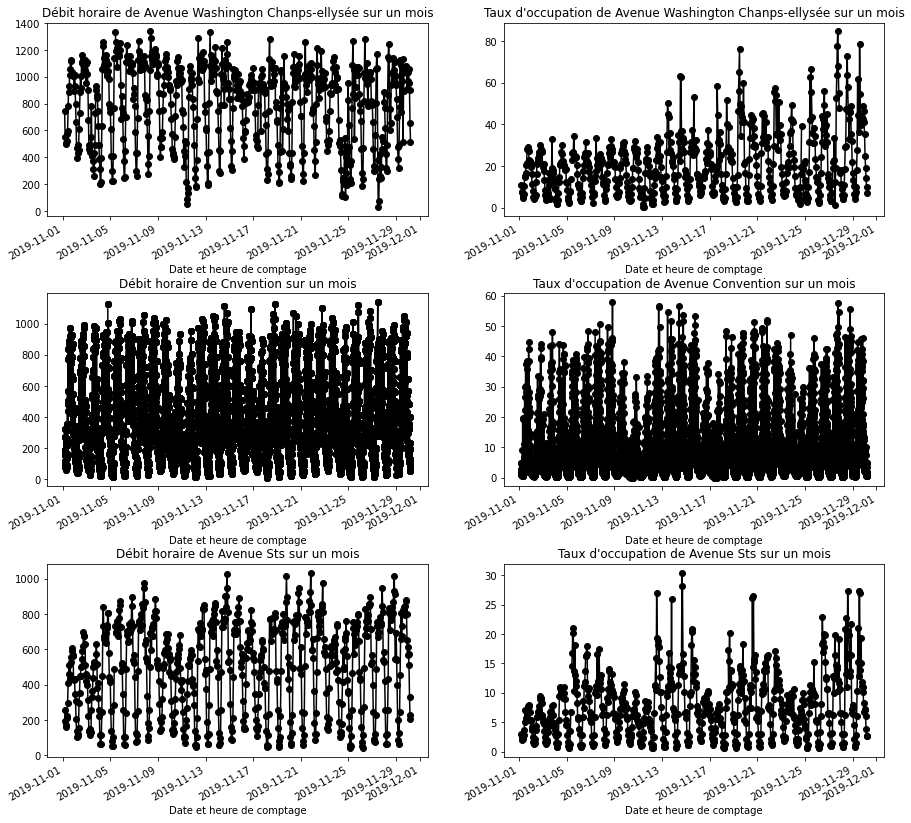

In [14]:
t_min = pd.Timestamp('2019-10-30 05:00:00+0100')
t_max = pd.Timestamp('2019-11-30 05:00:00+0100')

fig = plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace = .4)

mask = (data_washington.index > t_min) & (data_washington.index <= t_max)
ax1 = fig.add_subplot(321)
ax1.set_title('Débit horaire de Avenue Washington Chanps-ellysée sur un mois')
data_washington.loc[mask, 'Débit horaire'].plot(ax=ax1, style='k-o')
ax2 = fig.add_subplot(322)
ax2.set_title('Taux d\'occupation de Avenue Washington Chanps-ellysée sur un mois')
data_washington.loc[mask, 'Taux d\'occupation'].plot(ax=ax2, style='k-o')

mask = (data_convention.index > t_min) & (data_convention.index <= t_max)
ax3 = fig.add_subplot(323)
ax3.set_title('Débit horaire de Cnvention sur un mois')
data_convention.loc[mask, 'Débit horaire'].plot(ax=ax3, style='k-o')
ax4 = fig.add_subplot(324)
ax4.set_title('Taux d\'occupation de Avenue Convention sur un mois')
data_convention.loc[mask, 'Taux d\'occupation'].plot(ax=ax4, style='k-o')

mask = (data_sts.index > t_min) & (data_sts.index <= t_max)
ax5 = fig.add_subplot(325)
ax5.set_title('Débit horaire de Avenue Sts sur un mois')
data_sts.loc[mask, 'Débit horaire'].plot(ax=ax5, style='k-o')
ax6 = fig.add_subplot(326)
ax6.set_title('Taux d\'occupation de Avenue Sts sur un mois')
data_sts.loc[mask, 'Taux d\'occupation'].plot(ax=ax6, style='k-o')

plt.show()

### Jointure avec les données de vacances

In [15]:
data_vacance_scolaire = pd.read_csv('fr-en-calendrier-scolaire.csv', parse_dates=True, sep=';')
data_vacance_scolaire = data_vacance_scolaire.loc[data_vacance_scolaire['location'] == 'Paris'].reset_index(drop=True)
data_vacance_scolaire['start_date'] = data_vacance_scolaire['start_date'].apply(lambda x: pd.to_datetime(x, format="%Y-%m-%d"))
data_vacance_scolaire['end_date'] = data_vacance_scolaire['end_date'].apply(lambda x: pd.to_datetime(x, format="%Y-%m-%d"))
data_vacance_scolaire = data_vacance_scolaire.loc[data_vacance_scolaire['start_date'] >= pd.Timestamp('2019-11-01')]
data_vacance_scolaire = data_vacance_scolaire.loc[data_vacance_scolaire['end_date'] <= pd.Timestamp('2020-12-02')]
data_vacance_scolaire.reset_index(drop=True, inplace=True)

data_jours_feriers = pd.read_csv('jours_feries_metropole.csv', parse_dates=True, sep=',')
data_jours_feriers = data_jours_feriers.loc[data_jours_feriers['zone'] == 'Métropole'].reset_index(drop=True)
# data_jours_feriers['date'] = data_jours_feriers['date'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))
# data_jours_feriers = data_jours_feriers.loc[data_jours_feriers['date'] >= pd.Timestamp('2019-11-01')]
# data_jours_feriers = data_jours_feriers.loc[data_jours_feriers['date'] <= pd.Timestamp('2020-12-02')]
# data_jours_feriers.reset_index(drop=True, inplace=True)


In [16]:
data_vacance_scolaire.head()

,description,population,start_date,end_date,location,zones,annee_scolaire
0,Vacances de Noël,NaN,2019-12-21,2020-01-06,Paris,Zone C,2019-2020
1,Vacances d'Hiver,NaN,2020-02-08,2020-02-24,Paris,Zone C,2019-2020
2,Vacances d'Été,NaN,2020-07-04,2020-09-01,Paris,Zone C,2019-2020
3,Vacances de Printemps,NaN,2020-04-04,2020-04-20,Paris,Zone C,2019-2020
4,Pont de l'Ascension,NaN,2020-05-20,2020-05-25,Paris,Zone C,2019-2020


In [17]:
data_jours_feriers.head()

,date,annee,zone,nom_jour_ferie
0,2000-01-01,2000,Métropole,1er janvier
1,2000-04-24,2000,Métropole,Lundi de Pâques
2,2000-05-01,2000,Métropole,1er mai
3,2000-05-08,2000,Métropole,8 mai
4,2000-06-01,2000,Métropole,Ascension


In [18]:
data_washington = data_washington.reset_index(drop=False, inplace=False)
data_convention = data_convention.reset_index(drop=False, inplace=False)
data_sts = data_sts.reset_index(drop=False, inplace=False)

data_washington['date'] = data_washington['Date et heure de comptage'].map(lambda x: str(x.year) + '-' + str(x.month) + '-' + str(x.day))
data_convention['date'] = data_convention['Date et heure de comptage'].map(lambda x: str(x.year) + '-' + str(x.month) + '-' + str(x.day))
data_sts['date'] = data_sts['Date et heure de comptage'].map(lambda x: str(x.year) + '-' + str(x.month) + '-' + str(x.day))

In [19]:
data_washington_new = pd.merge(data_washington, data_jours_feriers[['date', 'nom_jour_ferie']],
                               left_on='date', right_on='date', how='left')
data_convention_new = pd.merge(data_convention, data_jours_feriers[['date', 'nom_jour_ferie']],
                               left_on='date', right_on='date', how='left')
data_sts_new = pd.merge(data_sts, data_jours_feriers[['date', 'nom_jour_ferie']],
                        left_on='date', right_on='date', how='left')

In [20]:
data_sts_new.head()

,Date et heure de comptage,Identifiant arc,Libelle,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape,date,nom_jour_ferie
0,2020-11-02 09:00:00+01:00,191,Sts_Peres,631.0,10.12334,Fluide,114,Sts_Peres-Voltaire,119,Sts_Peres-Universite,Invalide,2005-01-01,2019-06-01,"48.8572803712,2.33245419072","{""type"": ""LineString"", ""coordinates"": [[2.3332...",2020-11-2,NaN
1,2020-07-01 06:00:00+02:00,191,Sts_Peres,86.0,1.07167,Fluide,114,Sts_Peres-Voltaire,119,Sts_Peres-Universite,Invalide,2005-01-01,2019-06-01,"48.8572803712,2.33245419072","{""type"": ""LineString"", ""coordinates"": [[2.3332...",2020-7-1,NaN
2,2020-11-02 10:00:00+01:00,191,Sts_Peres,574.0,8.32278,Fluide,114,Sts_Peres-Voltaire,119,Sts_Peres-Universite,Invalide,2005-01-01,2019-06-01,"48.8572803712,2.33245419072","{""type"": ""LineString"", ""coordinates"": [[2.3332...",2020-11-2,NaN
3,2020-10-01 16:00:00+02:00,191,Sts_Peres,NaN,NaN,Inconnu,114,Sts_Peres-Voltaire,119,Sts_Peres-Universite,Invalide,2005-01-01,2019-06-01,"48.8572803712,2.33245419072","{""type"": ""LineString"", ""coordinates"": [[2.3332...",2020-10-1,NaN
4,2020-08-12 13:00:00+02:00,191,Sts_Peres,NaN,NaN,Inconnu,114,Sts_Peres-Voltaire,119,Sts_Peres-Universite,Invalide,2005-01-01,2019-06-01,"48.8572803712,2.33245419072","{""type"": ""LineString"", ""coordinates"": [[2.3332...",2020-8-12,NaN


In [21]:
data_washington_new['jour_ferie'] = data_washington_new['nom_jour_ferie'].map(lambda x: 0 if pd.isnull(x)  else 1)
data_convention_new['jour_ferie'] = data_convention_new['nom_jour_ferie'].map(lambda x: 0 if pd.isnull(x) else 1)
data_sts_new['jour_ferie'] = data_sts_new['nom_jour_ferie'].map(lambda x: 0 if pd.isnull(x) else 1)

# data_washington_new.drop('nom_jour_ferie', axis=1, inplace=True)
# data_convention_new.drop('nom_jour_ferie', axis=1, inplace=True)
# data_sts_new.drop('nom_jour_ferie', axis=1, inplace=True)

In [22]:
data_vacance_scolaire 

,description,population,start_date,end_date,location,zones,annee_scolaire
0,Vacances de Noël,NaN,2019-12-21,2020-01-06,Paris,Zone C,2019-2020
1,Vacances d'Hiver,NaN,2020-02-08,2020-02-24,Paris,Zone C,2019-2020
2,Vacances d'Été,NaN,2020-07-04,2020-09-01,Paris,Zone C,2019-2020
3,Vacances de Printemps,NaN,2020-04-04,2020-04-20,Paris,Zone C,2019-2020
4,Pont de l'Ascension,NaN,2020-05-20,2020-05-25,Paris,Zone C,2019-2020
5,Vacances de la Toussaint,NaN,2020-10-17,2020-11-02,Paris,Zone C,2020-2021


In [23]:
data_washington_new['date'] = data_washington_new['date'].apply(lambda x: pd.Timestamp(x))
data_convention_new['date'] = data_convention_new['date'].apply(lambda x: pd.Timestamp(x))
data_sts_new['date'] = data_sts_new['date'].apply(lambda x: pd.Timestamp(x))

In [24]:
data_washington_new.loc[0, 'date']

Timestamp('2020-11-02 00:00:00')

In [25]:
sd_noel = pd.Timestamp('2019-12-21')
ed_noel = pd.Timestamp('2020-01-06')

sd_hiver = pd.Timestamp('2020-02-08')
ed_hiver = pd.Timestamp('2020-02-24')

sd_ete = pd.Timestamp('2020-07-04')
ed_ete = pd.Timestamp('2020-09-01')

sd_printemps = pd.Timestamp('2020-04-04')
ed_printemps = pd.Timestamp('2020-04-20')

sd_ascension = pd.Timestamp('2019-05-20')
ed_ascension = pd.Timestamp('2020-05-25')

sd_toussaint = pd.Timestamp('2020-10-17')
ed_toussaint = pd.Timestamp('2020-11-02')

def get_name_vacation(x):
    if (x >= sd_noel and x < ed_noel):
        return 'noel'
    elif (x >= sd_hiver and x < ed_hiver):
        return 'hiver'
    elif (x >= sd_ete and x < ed_ete):
        return 'été'
    elif (x >= sd_printemps and x < ed_printemps):
        return 'printemps'
    elif (x >= sd_ascension and x < ed_ascension):
        return 'ascension'
    elif (x >= sd_toussaint and x < ed_toussaint):
        return 'toussaint'
    else:
        return np.nan
        

In [26]:
data_washington_new['nom_vacance_scolaire'] = data_washington_new['date'].map(get_name_vacation)
data_convention_new['nom_vacance_scolaire'] = data_convention_new['date'].map(get_name_vacation)
data_sts_new['nom_vacance_scolaire'] = data_sts_new['date'].map(get_name_vacation)

data_washington_new['vacance_scolaire'] = data_washington_new['nom_vacance_scolaire'].map(lambda x: 0 if pd.isnull(x) else 1)
data_convention_new['vacance_scolaire'] = data_convention_new['nom_vacance_scolaire'].map(lambda x: 0 if pd.isnull(x) else 1)
data_sts_new['vacance_scolaire'] = data_sts_new['nom_vacance_scolaire'].map(lambda x: 0 if pd.isnull(x) else 1)

In [27]:
data_sts_new.head()

,Date et heure de comptage,Identifiant arc,Libelle,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape,date,nom_jour_ferie,jour_ferie,nom_vacance_scolaire,vacance_scolaire
0,2020-11-02 09:00:00+01:00,191,Sts_Peres,631.0,10.12334,Fluide,114,Sts_Peres-Voltaire,119,Sts_Peres-Universite,Invalide,2005-01-01,2019-06-01,"48.8572803712,2.33245419072","{""type"": ""LineString"", ""coordinates"": [[2.3332...",2020-11-02,NaN,0,NaN,0
1,2020-07-01 06:00:00+02:00,191,Sts_Peres,86.0,1.07167,Fluide,114,Sts_Peres-Voltaire,119,Sts_Peres-Universite,Invalide,2005-01-01,2019-06-01,"48.8572803712,2.33245419072","{""type"": ""LineString"", ""coordinates"": [[2.3332...",2020-07-01,NaN,0,NaN,0
2,2020-11-02 10:00:00+01:00,191,Sts_Peres,574.0,8.32278,Fluide,114,Sts_Peres-Voltaire,119,Sts_Peres-Universite,Invalide,2005-01-01,2019-06-01,"48.8572803712,2.33245419072","{""type"": ""LineString"", ""coordinates"": [[2.3332...",2020-11-02,NaN,0,NaN,0
3,2020-10-01 16:00:00+02:00,191,Sts_Peres,NaN,NaN,Inconnu,114,Sts_Peres-Voltaire,119,Sts_Peres-Universite,Invalide,2005-01-01,2019-06-01,"48.8572803712,2.33245419072","{""type"": ""LineString"", ""coordinates"": [[2.3332...",2020-10-01,NaN,0,NaN,0
4,2020-08-12 13:00:00+02:00,191,Sts_Peres,NaN,NaN,Inconnu,114,Sts_Peres-Voltaire,119,Sts_Peres-Universite,Invalide,2005-01-01,2019-06-01,"48.8572803712,2.33245419072","{""type"": ""LineString"", ""coordinates"": [[2.3332...",2020-08-12,NaN,0,été,1


In [28]:
data_washington_new.to_csv('av_chanps_elysees.csv', encoding='utf-8')
data_convention_new.to_csv('av_convention.csv', encoding='utf-8')
data_washington_new.to_csv('av_sts_peres.csv', encoding='utf-8')

In [29]:
data_washington_new.head()

,Date et heure de comptage,Identifiant arc,Libelle,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape,date,nom_jour_ferie,jour_ferie,nom_vacance_scolaire,vacance_scolaire
0,2020-11-02 05:00:00+01:00,4264,AV_Champs_Elysees,144.0,2.25611,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009...",2020-11-02,NaN,0,NaN,0
1,2020-11-01 23:00:00+01:00,4264,AV_Champs_Elysees,245.0,8.11222,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009...",2020-11-01,NaN,0,toussaint,1
2,2020-07-01 16:00:00+02:00,4264,AV_Champs_Elysees,1138.0,17.86611,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009...",2020-07-01,NaN,0,NaN,0
3,2020-07-01 22:00:00+02:00,4264,AV_Champs_Elysees,880.0,16.03611,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009...",2020-07-01,NaN,0,NaN,0
4,2020-08-05 03:00:00+02:00,4264,AV_Champs_Elysees,487.0,6.35389,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009...",2020-08-05,NaN,0,été,1


In [43]:
data_washington_new['dayofweek'] = data_washington_new['date'].dt.day_name()
data_convention_new['dayofweek'] = data_convention_new['date'].dt.day_name()
data_sts_new['dayofweek'] = data_sts_new['date'].dt.day_name()

In [44]:
data_washington_new['month'] = data_washington_new['date'].map(lambda x: x.month)
data_convention_new['month'] = data_convention_new['date'].map(lambda x: x.month)
data_sts_new['month'] = data_sts_new['date'].map(lambda x: x.month)

In [45]:
data_washington_new['year'] = data_washington_new['date'].map(lambda x: x.year)
data_convention_new['year'] = data_convention_new['date'].map(lambda x: x.year)
data_sts_new['year'] = data_sts_new['date'].map(lambda x: x.year)

In [46]:
data_washington_new.head(5)

,Date et heure de comptage,Identifiant arc,Libelle,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,...,geo_point_2d,geo_shape,date,nom_jour_ferie,jour_ferie,nom_vacance_scolaire,vacance_scolaire,dayofweek,month,year
0,2020-11-02 05:00:00+01:00,4264,AV_Champs_Elysees,144.0,2.25611,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,...,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009...",2020-11-02,NaN,0,NaN,0,Monday,11,2020
1,2020-11-01 23:00:00+01:00,4264,AV_Champs_Elysees,245.0,8.11222,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,...,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009...",2020-11-01,NaN,0,toussaint,1,Sunday,11,2020
2,2020-07-01 16:00:00+02:00,4264,AV_Champs_Elysees,1138.0,17.86611,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,...,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009...",2020-07-01,NaN,0,NaN,0,Wednesday,7,2020
3,2020-07-01 22:00:00+02:00,4264,AV_Champs_Elysees,880.0,16.03611,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,...,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009...",2020-07-01,NaN,0,NaN,0,Wednesday,7,2020
4,2020-08-05 03:00:00+02:00,4264,AV_Champs_Elysees,487.0,6.35389,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,...,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009...",2020-08-05,NaN,0,été,1,Wednesday,8,2020


In [50]:
data_washington_new = data_washington_new[['Date et heure de comptage', 'Identifiant arc', 'jour_ferie', 'nom_jour_ferie', 'vacance_scolaire', 'nom_vacance_scolaire', 'dayofweek', 'month', 'year']]
data_convention_new = data_convention_new[['Date et heure de comptage', 'Identifiant arc', 'jour_ferie', 'nom_jour_ferie', 'vacance_scolaire', 'nom_vacance_scolaire', 'dayofweek', 'month', 'year']]
data_sts_new = data_sts_new[['Date et heure de comptage', 'Identifiant arc', 'jour_ferie', 'nom_jour_ferie', 'vacance_scolaire', 'nom_vacance_scolaire', 'dayofweek', 'month', 'year']]

In [51]:
data_washington_new.to_csv('av_chanps_elysees_vancances.csv', encoding='utf-8')
data_convention_new.to_csv('av_convention_vacances.csv', encoding='utf-8')
data_washington_new.to_csv('av_sts_peres_vacances.csv', encoding='utf-8')